# Student Score Prediction

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [4]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/Student Score Prediction.csv')
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Preprocessing

In [10]:
# Handling Null Values
df.isnull().sum()   


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# Handling Duplicate Values
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
one_hot_cols = [
    'gender',
    'race/ethnicity',
    'lunch',
    'test preparation course'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [17]:
edu_mapping = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df['parental level of education'] = df['parental level of education'].map(edu_mapping)


In [18]:
df.head()

,parental level of education,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,4,72,72,74,False,True,False,False,False,True,True
1,2,69,90,88,False,False,True,False,False,True,False
2,5,90,95,93,False,True,False,False,False,True,True
3,3,47,57,44,True,False,False,False,False,False,True
4,2,76,78,75,True,False,True,False,False,True,True


In [19]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: []


In [23]:
# creating a new column 'average score'
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()


,parental level of education,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,average score
0,4,72,72,74,False,True,False,False,False,True,True,72.666667
1,2,69,90,88,False,False,True,False,False,True,False,82.333333
2,5,90,95,93,False,True,False,False,False,True,True,92.666667
3,3,47,57,44,True,False,False,False,False,False,True,49.333333
4,2,76,78,75,True,False,True,False,False,True,True,76.333333


In [24]:
# Now Scaling : Standardization(Z-score scaling) and Normalization(Min-Max scaling)

numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('average score')  # Assuming 'score' is the target variable
print("Numerical columns for scaling:", numerical_cols_for_scaling)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])


print("Columns after processing:", df.columns.tolist())
print("First 5 rows of the dataframe:")
display(df.head())

Numerical columns for scaling: ['parental level of education', 'math score', 'reading score', 'writing score']
Columns after processing: ['parental level of education', 'math score', 'reading score', 'writing score', 'gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', 'lunch_standard', 'test preparation course_none', 'average score']
First 5 rows of the dataframe:


,parental level of education,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,average score
0,0.8,0.72,0.662651,0.711111,False,True,False,False,False,True,True,72.666667
1,0.4,0.69,0.879518,0.866667,False,False,True,False,False,True,False,82.333333
2,1.0,0.90,0.939759,0.922222,False,True,False,False,False,True,True,92.666667
3,0.6,0.47,0.481928,0.377778,True,False,False,False,False,False,True,49.333333
4,0.4,0.76,0.734940,0.722222,True,False,True,False,False,True,True,76.333333


## Training Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variable (y)
X = df.drop('average score', axis=1)
y = df['average score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluation

Evaluation metrics on test set:
MAE     1.947775e-14
MSE     5.744958e-28
RMSE    2.396864e-14
R2      1.000000e+00


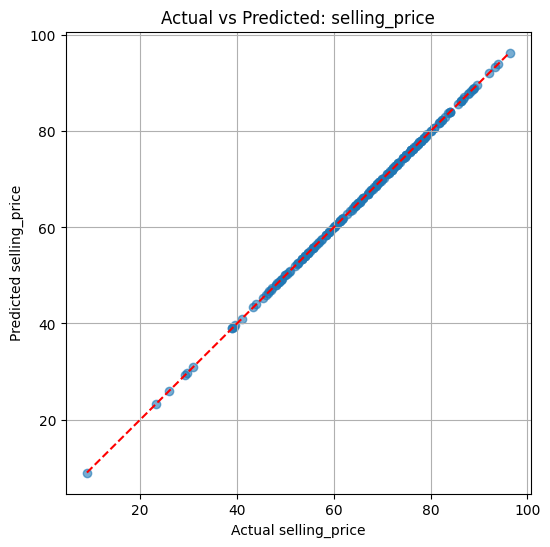

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
import pandas as pd
metrics = pd.Series({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
})
print("Evaluation metrics on test set:")
print(metrics.to_string())

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual selling_price')
plt.ylabel('Predicted selling_price')
plt.title('Actual vs Predicted: selling_price')
plt.grid(True)
plt.show()

Thanks!